In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle1.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle1.json

In [4]:
!kaggle datasets download -d yogesh239/twitter-data-about-2019-indian-general-election

Dataset URL: https://www.kaggle.com/datasets/yogesh239/twitter-data-about-2019-indian-general-election
License(s): CC0-1.0
 29% 5.00M/17.1M [00:00<00:00, 45.3MB/s]
100% 17.1M/17.1M [00:00<00:00, 96.0MB/s]


In [5]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.util import pr
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import string
from sklearn.tree import DecisionTreeClassifier

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
Modi_related_tweets=pd.read_csv('/content/ModiRelatedTweetsWithSentiment.csv')

In [8]:
Rahul_related_tweets=pd.read_csv('/content/RahulRelatedTweetsWithSentiment.csv')

In [9]:
Modi_related_tweets.head()

,Unnamed: 0,Date,User,Tweet,Emotion
0,0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,neg
1,1,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
2,2,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
3,3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,pos
4,4,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,pos


In [10]:
Rahul_related_tweets.head()

,Unnamed: 0,Date,User,Tweet,Emotion
0,0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder why no academic or journalist asks INC ...,pos
1,1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats for the change #australiavotes2019 an...,pos
2,2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,neg
3,3,2019-05-18 18:52:03+00:00,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",pos
4,4,2019-05-18 18:31:10+00:00,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,pos


In [11]:
Rahul_related_tweets.shape

(14261, 5)

In [12]:
Modi_related_tweets.shape

(25688, 5)

In [13]:
Modi_related_tweets = Modi_related_tweets[['Tweet','Emotion']]
Modi_related_tweets.head()

,Tweet,Emotion
0,@anjanaomkashyap I am seeing you as future #bj...,neg
1,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
2,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
3,PM Modi creates a new record of being the only...,pos
4,@abhijitmajumder Appointment of Successor! \n\...,pos


In [14]:
Rahul_related_tweets = Rahul_related_tweets[['Tweet','Emotion']]
Rahul_related_tweets.head()

,Tweet,Emotion
0,Wonder why no academic or journalist asks INC ...,pos
1,Congrats for the change #australiavotes2019 an...,pos
2,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,neg
3,"@ajaymaken @RahulGandhi And as a final touch, ...",pos
4,#LokSabhaElections2019 Anyone not having mass ...,pos


In [15]:
Modi_related_tweets.rename(columns = {'Tweet':'Tweet_modi','Emotion':'Emotion_modi'}, inplace = True)
Rahul_related_tweets.rename(columns = {'Tweet':'Tweet_rahul','Emotion':'Emotion_rahul'}, inplace = True)

<ipython-input-15-796ca2143035>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rahul_related_tweets.rename(columns = {'Tweet':'Tweet_rahul','Emotion':'Emotion_rahul'}, inplace = True)


In [16]:
Rahul_related_tweets.head()

,Tweet_rahul,Emotion_rahul
0,Wonder why no academic or journalist asks INC ...,pos
1,Congrats for the change #australiavotes2019 an...,pos
2,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,neg
3,"@ajaymaken @RahulGandhi And as a final touch, ...",pos
4,#LokSabhaElections2019 Anyone not having mass ...,pos


In [17]:
Modi_related_tweets.head()

,Tweet_modi,Emotion_modi
0,@anjanaomkashyap I am seeing you as future #bj...,neg
1,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
2,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
3,PM Modi creates a new record of being the only...,pos
4,@abhijitmajumder Appointment of Successor! \n\...,pos


In [18]:
train1 = pd.read_csv('/content/ModiRelatedTweetsWithSentiment.csv')
print("Training Set 1 :"% train1.columns, train1.shape)
test1 = pd.read_csv('/content/ModiRelatedTweetsWithSentiment.csv')
print("Test Set 1 :"% test1.columns, test1.shape)

print('Train Set 1 -----')
print(train1.isnull().sum())
print('Test Set 1 -----')
print(test1.isnull().sum())
train1.head()

Training Set 1 : (25688, 5)
Test Set 1 : (25688, 5)
Train Set 1 -----
Unnamed: 0    0
Date          3
User          5
Tweet         5
Emotion       7
dtype: int64
Test Set 1 -----
Unnamed: 0    0
Date          3
User          5
Tweet         5
Emotion       7
dtype: int64


,Unnamed: 0,Date,User,Tweet,Emotion
0,0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,neg
1,1,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
2,2,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
3,3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,pos
4,4,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,pos


In [19]:
df = pd.read_csv('/content/RahulRelatedTweetsWithSentiment.csv')
df = df[['Tweet','Emotion']]
df.head()

,Tweet,Emotion
0,Wonder why no academic or journalist asks INC ...,pos
1,Congrats for the change #australiavotes2019 an...,pos
2,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,neg
3,"@ajaymaken @RahulGandhi And as a final touch, ...",pos
4,#LokSabhaElections2019 Anyone not having mass ...,pos


In [20]:
train1 = pd.read_csv('/content/ModiRelatedTweetsWithSentiment.csv')
train1 = train1[['Tweet','Emotion']]
train1.head()

,Tweet,Emotion
0,@anjanaomkashyap I am seeing you as future #bj...,neg
1,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
2,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
3,PM Modi creates a new record of being the only...,pos
4,@abhijitmajumder Appointment of Successor! \n\...,pos


In [21]:
df = df[['Tweet','Emotion']]
df.head()

,Tweet,Emotion
0,Wonder why no academic or journalist asks INC ...,pos
1,Congrats for the change #australiavotes2019 an...,pos
2,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,neg
3,"@ajaymaken @RahulGandhi And as a final touch, ...",pos
4,#LokSabhaElections2019 Anyone not having mass ...,pos


In [22]:
train2, test2 = train_test_split(df, test_size=0.25,random_state=10, shuffle=True)

train2 = train2[['Tweet','Emotion']]
test2 = test2[['Tweet','Emotion']]

print("Training Set 2 :"% train2.columns, train2.shape)
print("Test Set 2 :"% test2.columns, test2.shape)
print('Train Set 2 -----')
print(train2.isnull().sum())
print('Test Set 2 -----')
print(test2.isnull().sum())
train2.head()

Training Set 2 : (10695, 2)
Test Set 2 : (3566, 2)
Train Set 2 -----
Tweet      0
Emotion    0
dtype: int64
Test Set 2 -----
Tweet      0
Emotion    0
dtype: int64


,Tweet,Emotion
9161,Sorry @RahulGandhi &amp; @narendramodi every a...,neg
9526,I guess best comedian of the year award should...,neg
4792,#LokSabhaElections2019 Priyanka Gandhi to stee...,pos
7383,"Yamraj to a person: ""I AM COMING FOR YOU""\n\nY...",neg
7422,I request to all #media persons n @yadavakhile...,neg


In [23]:
train = pd.concat([train1, train2], ignore_index = True)
train.shape

(36383, 2)

In [24]:
train['Emotion'] = train['Emotion'].map({'pos': 1, 'neg': 0})

In [25]:
train['Emotion'].value_counts()

,count
Emotion,
0.0,20969
1.0,15407


In [26]:
test = pd.concat([test1,test2], ignore_index = True)
test.shape

(29254, 5)

In [27]:
from sklearn.utils import resample

In [28]:
pip install wordcloud lazypredict

In [29]:
import pandas as pd
from sklearn.utils import resample
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from lazypredict.Supervised import LazyClassifier, LazyRegressor
import pickle
import time

import os
for dirname, _, filenames in os.walk('/kaggle1/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [30]:
!pip install imbalanced-learn

In [31]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
import pandas as pd
import re
from imblearn.over_sampling import RandomOverSampler

def clean_text(df, Tweet):
    df[Tweet] = df[Tweet].apply(lambda x: x.lower() if isinstance(x, str) else x)
    df[Tweet] = df[Tweet].apply(lambda x: re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?', '', x) if isinstance(x, str) else x)
    return df

test_clean = clean_text(test, "Tweet")
train_clean = clean_text(train, "Tweet")

# Drop rows with NaN values in the 'Emotion' column
train_clean = train_clean.dropna(subset=['Emotion'])

ros = RandomOverSampler(random_state=123)
X_res, y_res = ros.fit_resample(train_clean.drop('Emotion', axis=1), train_clean['Emotion'])

train_upsampled = pd.concat([X_res, y_res], axis=1)
print(train_upsampled['Emotion'].value_counts())

Emotion
0.00    20969
1.00    20969
Name: count, dtype: int64


In [33]:
train_upsampled

,Tweet,Emotion
0,i am seeing you as future bjp spokespersongoo...,0.00
1,loksabhaelections2019 23rd may 2019 will revea...,0.00
2,loksabhaelections2019 23rd may 2019 will revea...,0.00
3,pm modi creates a new record of being the only...,1.00
4,appointment of successor god forbid if we all...,1.00
...,...,...
41933,just wish you a had taken this stance at the ...,1.00
41934,today is first day of loksabhaelections2019 ta...,1.00
41935,chairperson soniagandhi president rahulgandhi ...,1.00
41936,pm narendramodi to visit durgapur in west beng...,1.00


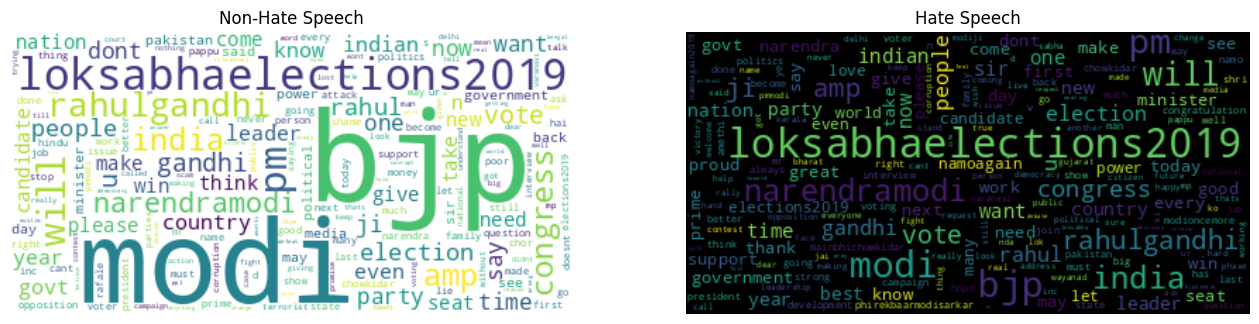

In [34]:
fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_clean['Tweet'][train.Emotion == 0])
text_neg = " ".join(train_clean['Tweet'][train.Emotion == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Speech')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Speech')

plt.show()

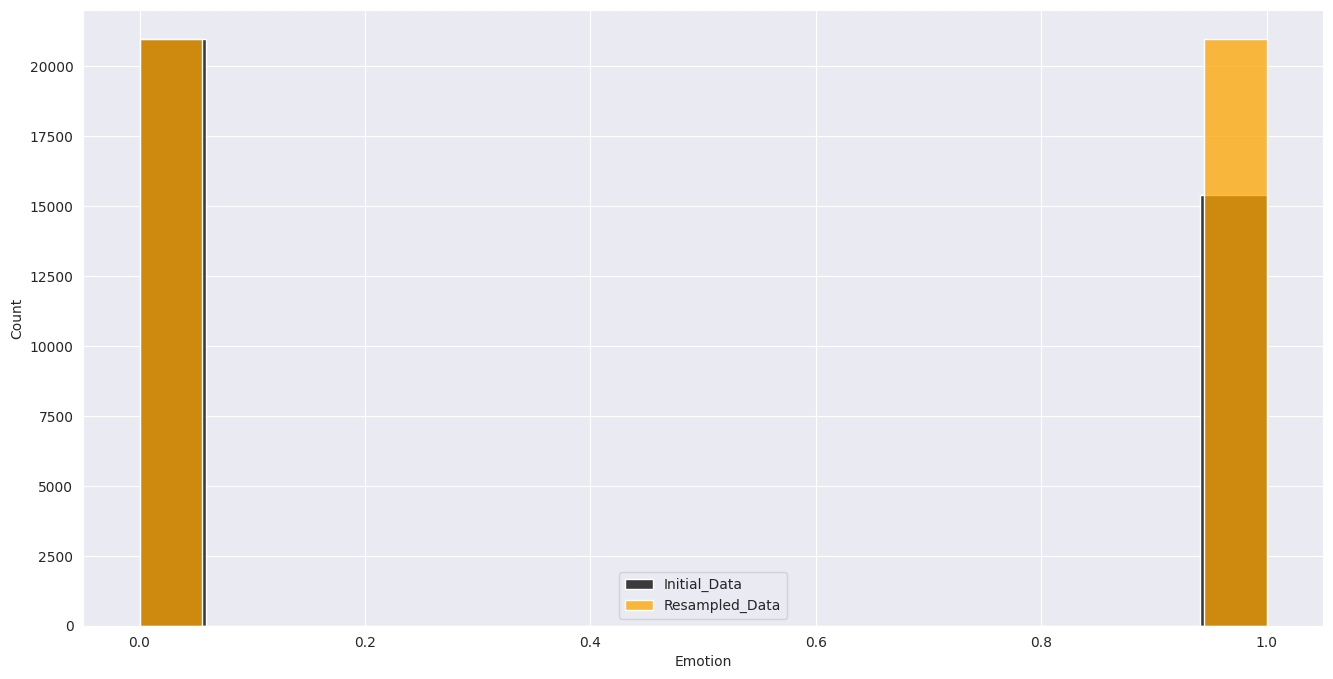

In [35]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.histplot(data = train['Emotion'], color='black', legend=True)
sns.histplot(data = train_upsampled['Emotion'], color = 'orange', legend=True)
plt.legend(['Initial_Data', 'Resampled_Data'])
plt.show()

After Upsampling the Minority Class


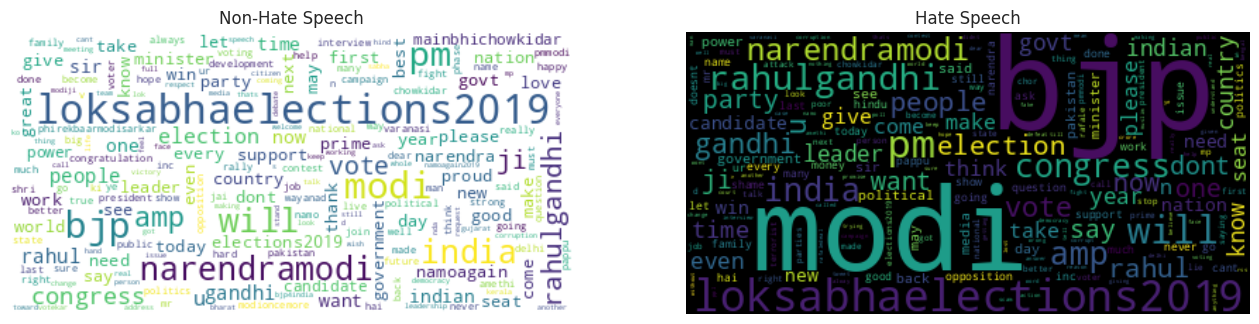

In [36]:
print('After Upsampling the Minority Class')

fig, axs = plt.subplots(1,2 , figsize=(16,8))

text_pos = " ".join(train_upsampled.loc[train_upsampled['Emotion'] == 1, 'Tweet'])
text_neg = " ".join(train_upsampled.loc[train_upsampled['Emotion'] == 0, 'Tweet'])

train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)

axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Speech')

axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Speech')

plt.show()

In [37]:
dt_trasformed = train_upsampled[['Emotion', 'Tweet']]
y = dt_trasformed.iloc[:, :-1].values

In [38]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))

y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [39]:
print(y.shape)


(41938, 2)


In [40]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [41]:
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(train_upsampled['Tweet']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
x.shape


(41938, 2000)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y_hate, test_size = 0.30, random_state = 1)


Gaussian NB

In [44]:
classifier_np = GaussianNB()
start_time = time.time()
classifier_np.fit(x_train, y_train)
end_time = time.time()

In [45]:
training_time = end_time - start_time

print(f"Training time of Naive Bayes: {training_time:.6f} seconds")

Training time of Naive Bayes: 1.635591 seconds


In [46]:
filename = 'Hate_speech_Modi_Rahul_with_two_dataset_model_GaussianNB.sav'
pickle.dump(classifier_np, open(filename, 'wb'))

KNN


In [47]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
start_time = time.time()
classifier_knn.fit(x_train, y_train)
end_time = time.time()

In [48]:
training_time = end_time - start_time

print(f"Training time of KNN: {training_time:.6f} seconds")

Training time of KNN: 0.006691 seconds


In [49]:
filename = 'Hate_speech_Modi_Rahul_with_two_dataset_model_KNN.sav'
pickle.dump(classifier_knn, open(filename, 'wb'))

Logistic Regression

In [ ]:
classifier_lr = LogisticRegression(random_state = 0)
start_time = time.time()
classifier_lr.fit(x_train, y_train)
end_time = time.time()

In [ ]:
training_time = end_time - start_time

print(f"Training time of Logistic Regression: {training_time:.6f} seconds")

In [ ]:
filename = 'Hate_speech_Modi_Rahul_with_two_dataset_model_Logistic_Regression.sav'
pickle.dump(classifier_lr, open(filename, 'wb'))

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    PrecisionRecallDisplay
)


In [ ]:
y_pred_knn = classifier_knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [ ]:
y_pred_lr=classifier_lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_lr, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [ ]:
y_pred_np = classifier_np.predict(x_test)
cm = confusion_matrix(y_test, y_pred_np)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_np, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [ ]:

knn_score = accuracy_score(y_test, y_pred_knn)

lr_score = accuracy_score(y_test, y_pred_lr)
np_score = accuracy_score(y_test, y_pred_np)

print ('--' * 20)
print('K-Nearest Neighbors Accuracy: ', str(knn_score))
print('F1 score: ', f1_score(y_test, y_pred_knn, labels = [1,0]))
print ('--' * 20)

print ('--' * 20)
print('Logistic Regression Accuracy: ',str(lr_score))
print('F1 score: ', f1_score(y_test, y_pred_lr, labels = [1,0]))
print ('--' * 20)

print ('--' * 20)
print('Naive Bayes Accuracy: ', str(np_score))
print('F1 score: ', f1_score(y_test, y_pred_np, labels = [1,0]))
print ('--' * 20)
print ('')

In [58]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
start_time = time.time()
classifier_dt.fit(x_train, y_train)
end_time = time.time()

In [59]:
training_time = end_time - start_time
print(f"Training time of Decision Tree: {training_time:.6f} seconds")

Training time of Decision Tree: 25.652490 seconds


In [60]:
filename = 'Hate_speech_Modi_Rahul_with_two_dataset_model_Decision_Tree.sav'
pickle.dump(classifier_dt, open(filename, 'wb'))

[[4867 1381]
 [1827 4507]]


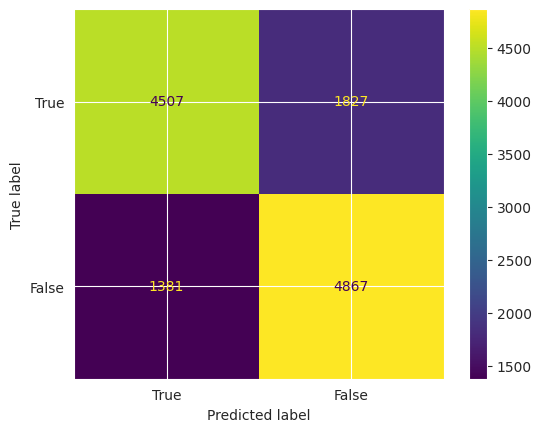

In [61]:
y_pred_dt = classifier_dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_dt, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [62]:
dt_score = accuracy_score(y_test, y_pred_dt)
print ('--' * 20)
print('Decision Tree Accuracy: ', str(dt_score))
print('F1 score: ', f1_score(y_test, y_pred_dt, labels = [1,0]))
print ('--' * 20)


----------------------------------------
Decision Tree Accuracy:  0.745032586234303
F1 score:  0.7375225004090984
----------------------------------------


In [63]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
start_time = time.time()
classifier_rf.fit(x_train, y_train)
end_time = time.time()

In [64]:
training_time = end_time - start_time
print(f"Training time of Random Forest: {training_time:.6f} seconds")

Training time of Random Forest: 7.439990 seconds


In [65]:
filename = 'Hate_speech_Modi_Rahul_with_two_dataset_model_Random_Forest.sav'
pickle.dump(classifier_rf, open(filename, 'wb'))

[[5105 1143]
 [1783 4551]]


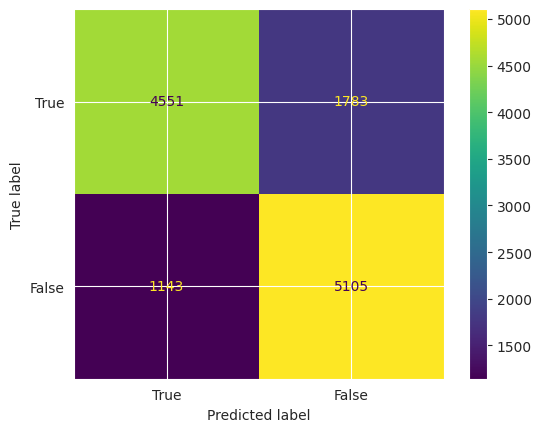

In [66]:
y_pred_rf = classifier_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_rf, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()

In [67]:
rf_score = accuracy_score(y_test, y_pred_rf)
print ('--' * 20)
print('Random Forest Accuracy: ', str(rf_score))
print('F1 score: ', f1_score(y_test, y_pred_rf, labels = [1,0]))
print ('--' * 20)

----------------------------------------
Random Forest Accuracy:  0.767445557145128
F1 score:  0.7567342866644496
----------------------------------------


In [70]:
!pip install tensorflow keras


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
459/459 - 302s - 657ms/step - accuracy: 0.7117 - loss: 0.5537 - val_accuracy: 0.7603 - val_loss: 0.4931
Epoch 2/5
459/459 - 320s - 697ms/step - accuracy: 0.7961 - loss: 0.4451 - val_accuracy: 0.7702 - val_loss: 0.4791
Epoch 3/5
459/459 - 317s - 690ms/step - accuracy: 0.8250 - loss: 0.3934 - val_accuracy: 0.7767 - val_loss: 0.4764
Epoch 4/5
459/459 - 320s - 696ms/step - accuracy: 0.8460 - loss: 0.3524 - val_accuracy: 0.7837 - val_loss: 0.4903
Epoch 5/5
459/459 - 294s - 641ms/step - accuracy: 0.8649 - loss: 0.3150 - val_accuracy: 0.7833 - val_loss: 0.5089
394/394 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step
Accuracy: 0.7833412811953584
F1 Score: 0.778013029315961


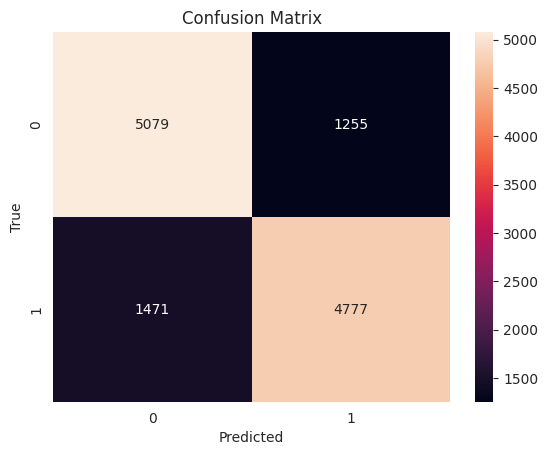

In [72]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example data loading
# Ensure train_upsampled is defined and structured correctly with columns 'Tweet' and 'Emotion'

# Tokenization
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(train_upsampled['Tweet'])
X = tokenizer.texts_to_sequences(train_upsampled['Tweet'])

# Padding sequences to ensure uniform input size
X = pad_sequences(X, maxlen=200)

# Prepare the target variable
y = train_upsampled['Emotion'].values

# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Building the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()

# Training the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluating the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Data preparation code (ensure this is executed first)
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import re

# Define a function to clean text data
def clean_text(df, column):
    df[column] = df[column].apply(lambda x: x.lower() if isinstance(x, str) else x)
    df[column] = df[column].apply(lambda x: re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+://\S+)|^rt|http.+?', '', x) if isinstance(x, str) else x)
    return df

# Load your data
train1 = pd.read_csv('ModiRelatedTweetsWithSentiment.csv')
train2 = pd.read_csv('RahulRelatedTweetsWithSentiment.csv')

# Keep relevant columns
train1 = train1[['Tweet', 'Emotion']]
train2 = train2[['Tweet', 'Emotion']]

# Clean the data
train1 = clean_text(train1, 'Tweet')
train2 = clean_text(train2, 'Tweet')

# Combine both data sets
train = pd.concat([train1, train2], ignore_index=True)

# Mapping Emotion to binary values
train['Emotion'] = train['Emotion'].map({'pos': 1, 'neg': 0})

# Drop any rows with missing values in 'Emotion'
train_clean = train.dropna(subset=['Emotion'])

# Upsample the minority class to balance the data
ros = RandomOverSampler(random_state=123)
X_res, y_res = ros.fit_resample(train_clean.drop('Emotion', axis=1), train_clean['Emotion'])

# Combine the resampled data
train_upsampled = pd.concat([X_res, y_res], axis=1)

# Ensure 'train_upsampled' is defined
print(train_upsampled.head())

# LSTM Model Training
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenization
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(train_upsampled['Tweet'])
X = tokenizer.texts_to_sequences(train_upsampled['Tweet'])

# Padding sequences
X = pad_sequences(X, maxlen=200)

# Prepare the target variable
y = train_upsampled['Emotion'].values

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Building the enhanced LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model Summary
model.summary()

# Training the Model with more epochs
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluating the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


                                               Tweet  Emotion
0   i am seeing you as future bjp spokespersongoo...      0.0
1  loksabhaelections2019 23rd may 2019 will revea...      0.0
2  loksabhaelections2019 23rd may 2019 will revea...      0.0
3  pm modi creates a new record of being the only...      1.0
4   appointment of successor god forbid if we all...      1.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
508/508 - 1073s - 2s/step - accuracy: 0.6320 - loss: 0.6295 - val_accuracy: 0.7096 - val_loss: 0.5609
Epoch 2/20
